<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [ ]:
.6

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, I do not agree with the knight because he has a 2/3 chance to capture a troll from the first bridge, which would mean there would still be a troll on that bridge after he captures one. The third bridge is also eliminated from the probability pool because it does not have any trolls to begin with.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

He can cross safely with E2 since there is only one troll and he captured it. Since E3 has zero trolls he can cross safely. He cannot cross safely with E1 because if he captures one troll there is still another troll that can attack him

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: P(E2|troll_captured) 

In [184]:
troll_captured = (3/10) * .4  # probability of having event one or two * probability of capturing a troll under one of those bridges
event_two = .2
p_troll_captured_giv_event_two = 1/5
p_event_two_giv_troll_captured = (p_troll_captured_giv_event_two * event_two) / troll_captured

0.3333333333333334

Probability of the other event given a troll captured: P(E3|troll_captured)

In [185]:
troll_captured = (3/10) * .4
event_three = .6
p_troll_captured_giv_event_three = 0
p_event_three_giv_troll_captured = (p_troll_captured_giv_event_three * event_three) / troll_captured

0.0

Probability of the third event: P(E1|troll_captured)

In [187]:
troll_captured = (3/10) * .4
event_one = .2
p_troll_captured_giv_event_one = 2/5
p_event_one_giv_troll_captured = (p_troll_captured_giv_event_one * event_one) / troll_captured

0.6666666666666669

### 1.5

#### What is the chance of the knight crossing safely?

In [ ]:
1/3

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [65]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [66]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [146]:
x = range(start= -10, step = 1, length = 21)
y_true = (x.^2) .+ 3 .*x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [147]:
using Distributions
g = di.Normal(0,10)
y_observed = y_true .+ rand(g,length(x))


21-element Vector{Float64}:
  69.84156366144413
  76.47982842152292
  40.760934529589576
  21.54571915583043
  14.915195370001713
  -9.063960068789399
  -8.798481877304948
 -19.973648012872868
  -5.1250536248010805
 -24.699613790325927
 -10.513270766478557
  10.764544913196708
  15.526125476331934
  33.724604192902575
  19.20418984703113
  43.131331550301525
  61.36526397070292
  61.54429810879907
  88.85052155121483
 122.8032015315799
 146.01622055832686

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

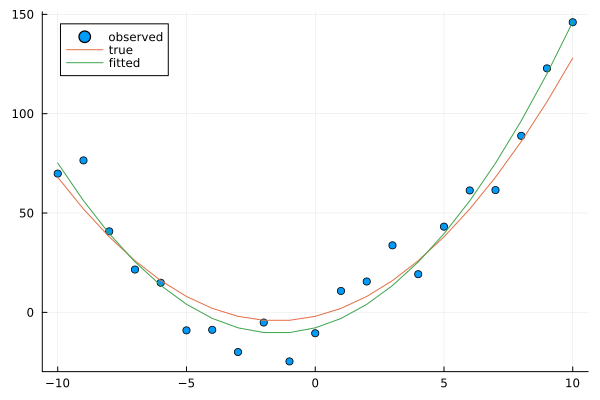

In [148]:
using Plots 
using Polynomials
scatter(x,y_observed,labels = "observed")
plot!(x,y_true,labels = "true")
line_fit = Polynomials.fit(x,y_observed,2)
fit_coeffs = coeffs(line_fit)
y_fitted = fit_coeffs[1] .+ fit_coeffs[2] .* x .+ fit_coeffs[3] .* (x.^2)
plot!(x,y_fitted,labels = "fitted" )

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

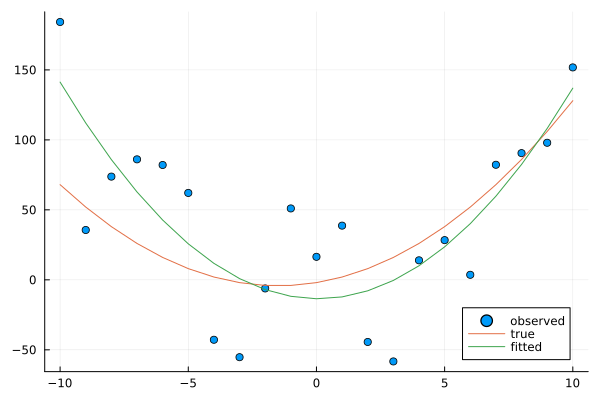

In [149]:
using Distributions
n = di.Normal(0,50)
y_observed = y_true .+ rand(n,length(x))

using Plots 
using Polynomials
scatter(x,y_observed,labels = "observed")
plot!(x,y_true,labels = "true")
line_fit = Polynomials.fit(x,y_observed,2)
fit_coeffs = coeffs(line_fit)
y_fitted = fit_coeffs[1] .+ fit_coeffs[2] .* x .+ fit_coeffs[3] .* (x.^2)
plot!(x,y_fitted,labels = "fitted" )

# 2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why? 

No, it is not as accurate because the noise is "larger" which means it interferes with the true data more, making the fit line not represent the data as well as with a "lesser" noise

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


In [150]:
using Distributions
g = di.Normal(0,10)
y_observed = y_true .+ rand(g,length(x))

21-element Vector{Float64}:
  72.17376401529732
  44.614006726551786
  33.848524180382746
  25.788740040723678
   4.7311128311713055
  -1.1258838858485554
   9.328196224486849
  -4.348870215907198
  10.063104508063809
  -5.735690346980139
  -2.560638764632865
   7.850082788493563
  11.604727838374957
  12.056629329426318
  36.770917236124944
  17.65516511915528
  56.100255160420325
  58.907734414418
  60.906813417282656
  99.13300769975075
 113.38822049756524

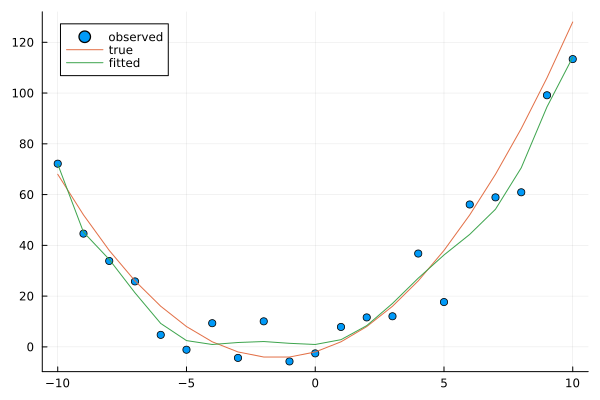

In [152]:


using Plots 
using Polynomials
scatter(x,y_observed,labels = "observed")
plot!(x,y_true,labels = "true")
line_fit = Polynomials.fit(x,y_observed,10)
fit_coeffs = coeffs(line_fit)
y_fitted = line_fit.(x)
plot!(x,y_fitted,labels = "fitted" )

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


In [153]:
x_fit = range(start = -11, step = 0.1, length = 221)
y_true = (x_fit.^2) .+ 3 .* x_fit .- 2

using Distributions
g = di.Normal(0,10)
y_observed = y_true .+ rand(g,length(x_fit))

221-element Vector{Float64}:
  90.7918648719887
  97.00011839585217
  71.59798467116354
  73.85359878282091
  79.20778860901851
  73.50776677637309
  71.32890726433692
  70.07657890751837
  69.55272775312132
  77.5638734284299
  80.583284103024
  68.63072891340127
  47.939928784806284
   ⋮
 135.47312987295928
 105.67770156968052
 124.33116469494784
 130.06085642215044
 149.43499756921932
 144.36790476367062
 147.53662298492299
 136.90713623008585
 159.60825987057748
 156.56020841532737
 164.93907178325352
 167.44763401086163

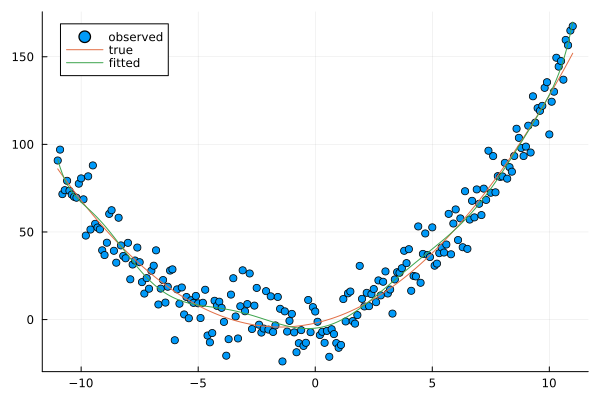

In [161]:
using Plots 
using Polynomials
scatter(x_fit,y_observed,labels = "observed")
plot!(x_fit,y_true,labels = "true")
poly_fit = Polynomials.fit(x_fit,y_observed,10)
fit_coeffs = coeffs(poly_fit)

y_fitted = poly_fit.(x_fit)
#y_fitted = fit_coeffs[1] .+ fit_coeffs[2] .* x_fit .+ fit_coeffs[3] .* (x_fit.^2) .+ fit_coeffs[4] .* (x_fit.^3) .+ fit_coeffs[5] .* (x_fit.^4) .+ fit_coeffs[6] .* (x_fit.^5) .+ fit_coeffs[7] .* (x_fit.^6) .+ fit_coeffs[8] .* (x_fit.^7) .+ fit_coeffs[9] .* (x_fit.^8) .+ fit_coeffs[10] .* (x_fit.^9) .+ fit_coeffs[11] .* (x_fit.^10)
plot!(x_fit,y_fitted,labels = "fitted" )

3. What do you observe in the plot? What is this phenomenon called?

The fitted line is close to the true line but keeps overshooting and under shooting because the fitted line is overfitting to the data. Overfitting